# Neural networks with Pytorch

Pytorch's real speciality comes when we are designing neural networks. To do that pytorch provides torch.nn module. The usage of it for simple neural network is as follows.

In [2]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch

In [13]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [100]:
t_un_val = t_u[0:5].unsqueeze(1) # Getting a batch of input data in right format.
linear_model = nn.Linear(1, 1) # Defining a linear model with 1 feature input and 1 output.
linear_model(t_un_val)

tensor([[34.4013],
        [53.6678],
        [55.8615],
        [78.4662],
        [54.0493]], grad_fn=<AddmmBackward0>)

In [101]:
linear_model.weight

Parameter containing:
tensor([[0.9538]], requires_grad=True)

In [102]:
linear_model.bias

Parameter containing:
tensor([0.3512], requires_grad=True)

So with the above details in mind, we can train a model on our data as follows.

In [104]:
linear_model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr = 1e-2)

In [112]:
def training_loop(n_iter, optimizer, model, loss_fn, input_val, true_val):

    for i in range(1, n_iter+1):
        preds = model(input_val)
        error = loss_fn(preds, true_val)

        optimizer.zero_grad()
        error.backward()
        optimizer.step()

        if(i%500==0):
            print(f"Iteration {i} completed with error value of {error}")

Here note the way we have done the forward pass and backpropagation. For the error calculation we have used MSELoss object as below.

In [113]:
training_loop(3000, optimizer, linear_model, nn.MSELoss(), (t_u*0.1).unsqueeze(1), t_c.unsqueeze(1))

Iteration 500 completed with error value of 2.927680015563965
Iteration 1000 completed with error value of 2.9276506900787354
Iteration 1500 completed with error value of 2.9276468753814697
Iteration 2000 completed with error value of 2.927645683288574
Iteration 2500 completed with error value of 2.9276459217071533
Iteration 3000 completed with error value of 2.927645206451416


In [114]:
linear_model.weight

Parameter containing:
tensor([[5.3676]], requires_grad=True)

In [115]:
linear_model.bias

Parameter containing:
tensor([-17.3042], requires_grad=True)

Now lets try to make our model bit complex by adding another layer with non linearity function.

In [117]:
seq_model = nn.Sequential(nn.Linear(1, 13), nn.Tanh(), nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [118]:
optimizer = torch.optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(5000, optimizer, seq_model, nn.MSELoss(), (t_u*0.1).unsqueeze(1), t_c.unsqueeze(1))

Iteration 500 completed with error value of 13.556865692138672
Iteration 1000 completed with error value of 4.3830461502075195
Iteration 1500 completed with error value of 2.8981070518493652
Iteration 2000 completed with error value of 3.2336199283599854
Iteration 2500 completed with error value of 2.56559681892395
Iteration 3000 completed with error value of 2.2086708545684814
Iteration 3500 completed with error value of 2.0127408504486084
Iteration 4000 completed with error value of 1.9087016582489014
Iteration 4500 completed with error value of 1.8605220317840576
Iteration 5000 completed with error value of 1.846612811088562


In [122]:
for name, param in seq_model.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[ 0.4746],
        [ 0.3836],
        [ 0.5416],
        [-0.2952],
        [-0.3671],
        [-0.3398],
        [-0.3841],
        [-0.2686],
        [ 0.5572],
        [ 0.2556],
        [-0.2377],
        [ 0.3369],
        [ 0.2430]], requires_grad=True)
0.bias Parameter containing:
tensor([-3.0327, -2.3930,  0.1535,  0.5494,  2.2717,  0.0535, -0.1637, -0.6447,
        -3.6018,  0.7447,  0.8626,  0.0419, -0.7606], requires_grad=True)
2.weight Parameter containing:
tensor([[ 3.5603,  2.9926,  1.5933, -2.4701, -2.9108, -2.0583, -2.2032, -1.7633,
          4.2308,  1.7592, -1.9548,  1.8415,  2.1390]], requires_grad=True)
2.bias Parameter containing:
tensor([1.8131], requires_grad=True)


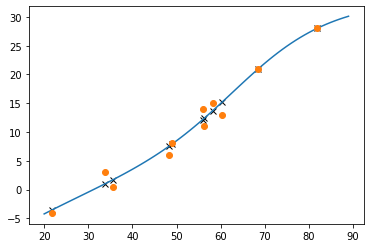

In [134]:
t_range = torch.arange(20., 90.).unsqueeze(1)


fig = plt.figure()

# Predictions plot and general model
plt.plot(t_u.numpy(), seq_model((0.1 * t_u).unsqueeze(1)).detach().numpy(), 'kx')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy())

# True values plot
plt.plot(t_u.numpy(), t_c.numpy(), 'o')